In [35]:
import numpy as np
from os import path, listdir,makedirs
import matplotlib.pyplot as plt
from scipy.stats import entropy,mode,skew,kurtosis
import pandas as pd
from sklearn.metrics import RocCurveDisplay,roc_curve,DetCurveDisplay
from scipy.special import expit
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [41]:
def plot_statistics(posteriors,ax):
   posteriors = posteriors.reshape(posteriors.shape[0],-1)
   std = np.std(posteriors,axis=1) #STD
   mad = np.median(np.absolute(posteriors - np.median(posteriors,axis=1).reshape(-1,1)),axis=1) #MAD
   mean_median_distance = np.mean(posteriors,axis=1) - np.median(posteriors,axis=1) #Mean_Median_Distance
   range =(np.max(posteriors,axis=1) - np.min(posteriors,axis=1))/np.std(posteriors,axis=1) #Range
   sd_mad_distance = std - mad #SD_MAD_Distance
   mean_mode_distance = np.mean(posteriors,axis=1) - mode(posteriors,axis=1,keepdims=False)[0] #Mean_Mode_Distance
   iqr = np.subtract(*np.percentile(posteriors, [75, 25],axis=1)) #IQR
   skewness = skew(posteriors,axis=1) #Skewness
   uniques_ratio = np.unique(posteriors, return_counts=True, axis=0)[1]/768 #Uniques, 768 es 32*24 que son las dimensiones de la grilla
   kurt = kurtosis(posteriors,axis=1) #Kurtos
   ax[0][0].hist(std,40,density=True)   
   ax[0][1].hist(mad,40,density=True)
   ax[0][2].hist(mean_median_distance,40,density=True)
   ax[1][0].hist(range,40,density=True)
   ax[1][1].hist(sd_mad_distance,40,density=True)
   ax[1][2].hist(mean_mode_distance,40,density=True)
   ax[2][0].hist(iqr,40,density=True)
   ax[2][1].hist(skewness,40,density=True)
   ax[2][2].hist(uniques_ratio,40,density=True)
   ax[3][0].hist(kurt,40,density=True)
   ax[0][0].set_xlabel("std")   
   ax[0][1].set_xlabel("mad")
   ax[0][2].set_xlabel("mean_median_distance")
   ax[1][0].set_xlabel("range")
   ax[1][1].set_xlabel("sd_mad_distance")
   ax[1][2].set_xlabel("mean_mode_distance")
   ax[2][0].set_xlabel("iqr")
   ax[2][1].set_xlabel("skewness")
   ax[2][2].set_xlabel("uniques")
   ax[3][0].set_xlabel("kurt")


#load input cross-val data
tp_data = np.load(path.abspath("target_present_data.npz"))
ta_data = np.load(path.abspath("target_absent_data.npz"))
fixations = np.concatenate((ta_data["fixations"],tp_data["fixations"]))
labels = np.concatenate((ta_data["labels"],tp_data["labels"]))
image_ids = np.concatenate((ta_data["image_ids"],tp_data["image_ids"]))
posteriors = np.concatenate((ta_data["posteriors"],tp_data["posteriors"]))

(146102,)
(24885,)


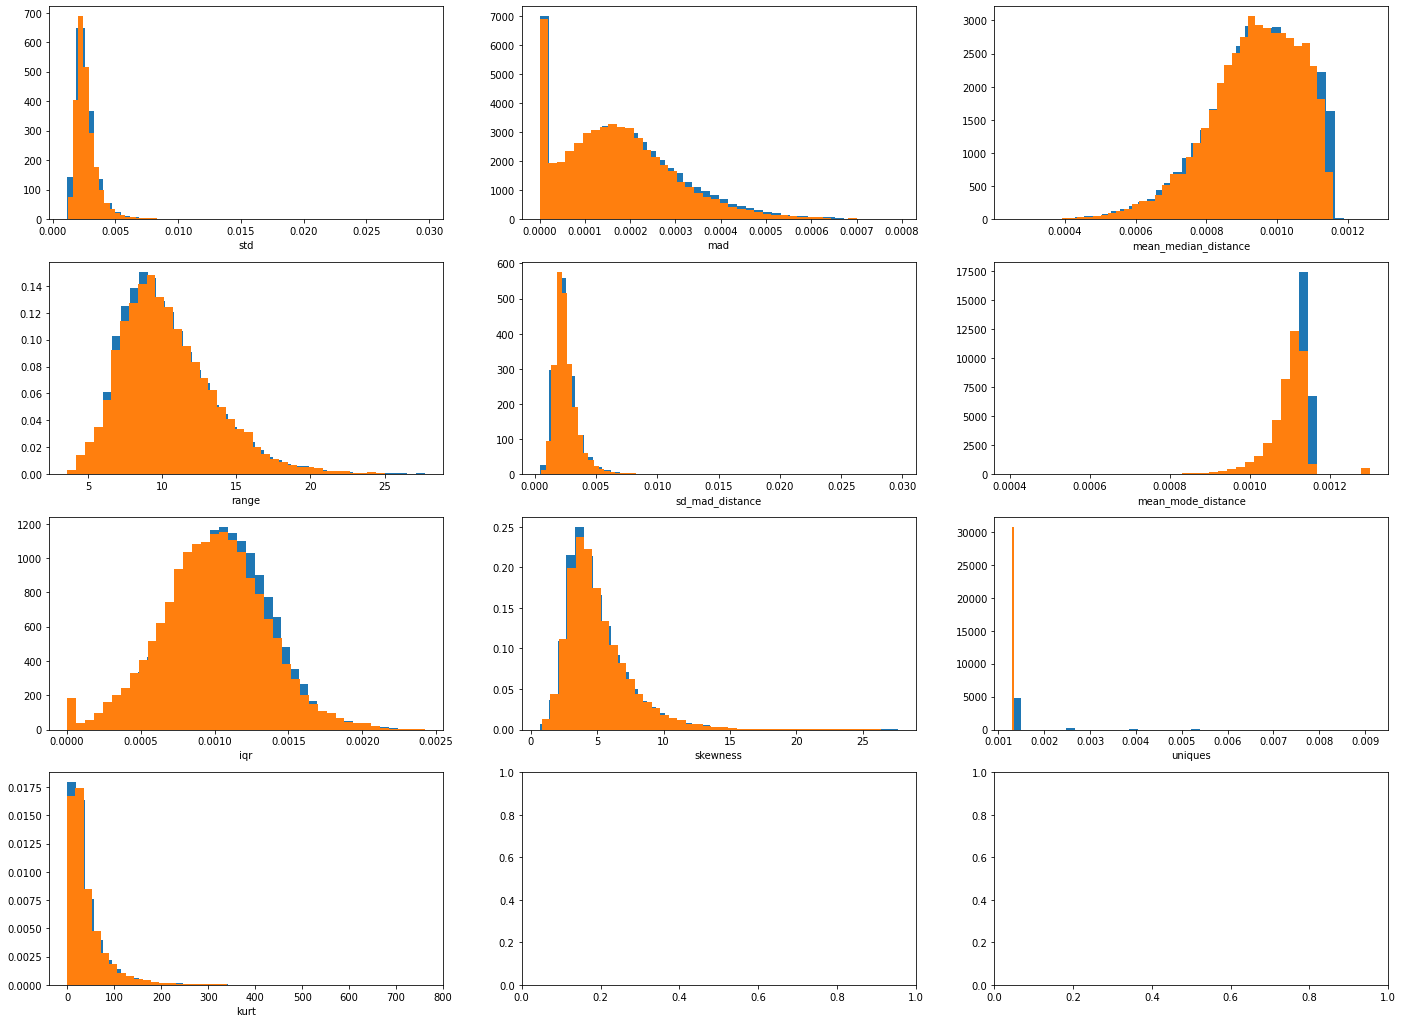

In [37]:
#plot by label
fig, ax = plt.subplots(4, 3, figsize = (24,18))

continue_labels_indexes = np.where(labels == 0)[0]
stop_labels_indexes = np.where(labels == 1)[0]
plot_statistics(posteriors[continue_labels_indexes],ax)
plot_statistics(posteriors[stop_labels_indexes],ax)

(35485,)
(6998,)
(925,)


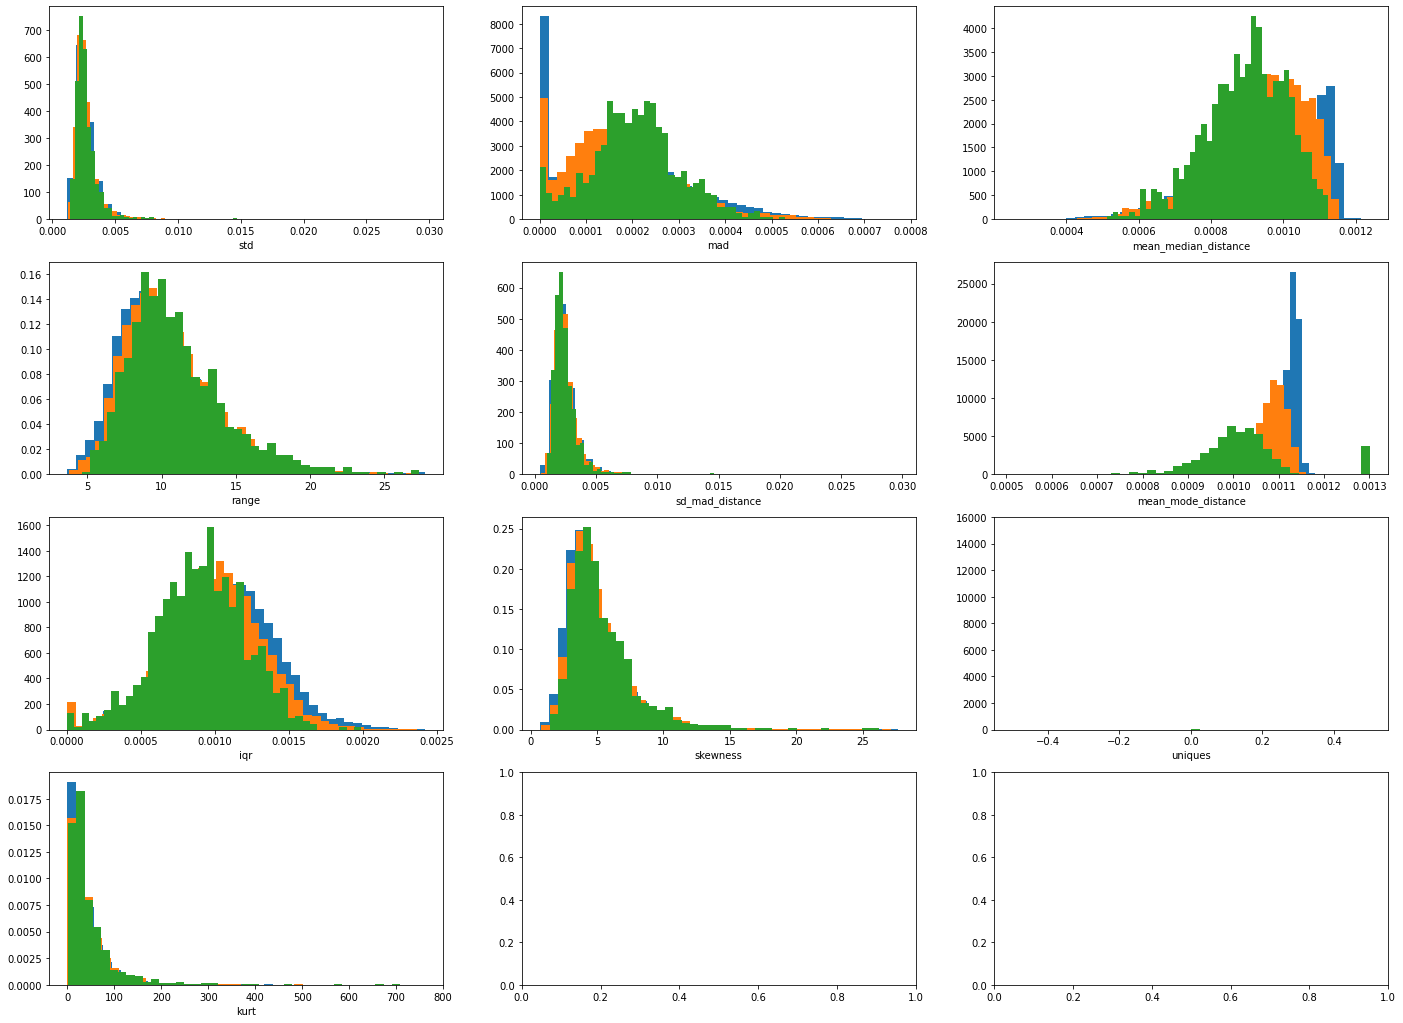

In [38]:
#plot by fixation_num
fig, ax = plt.subplots(4, 3, figsize = (24,18))

for fix_num in [2,7,15]:
    fix_indexes = np.where(fixations == fix_num)[0]
    plot_statistics(posteriors[fix_indexes],ax)

(45,)
(17,)
(68,)
(50,)


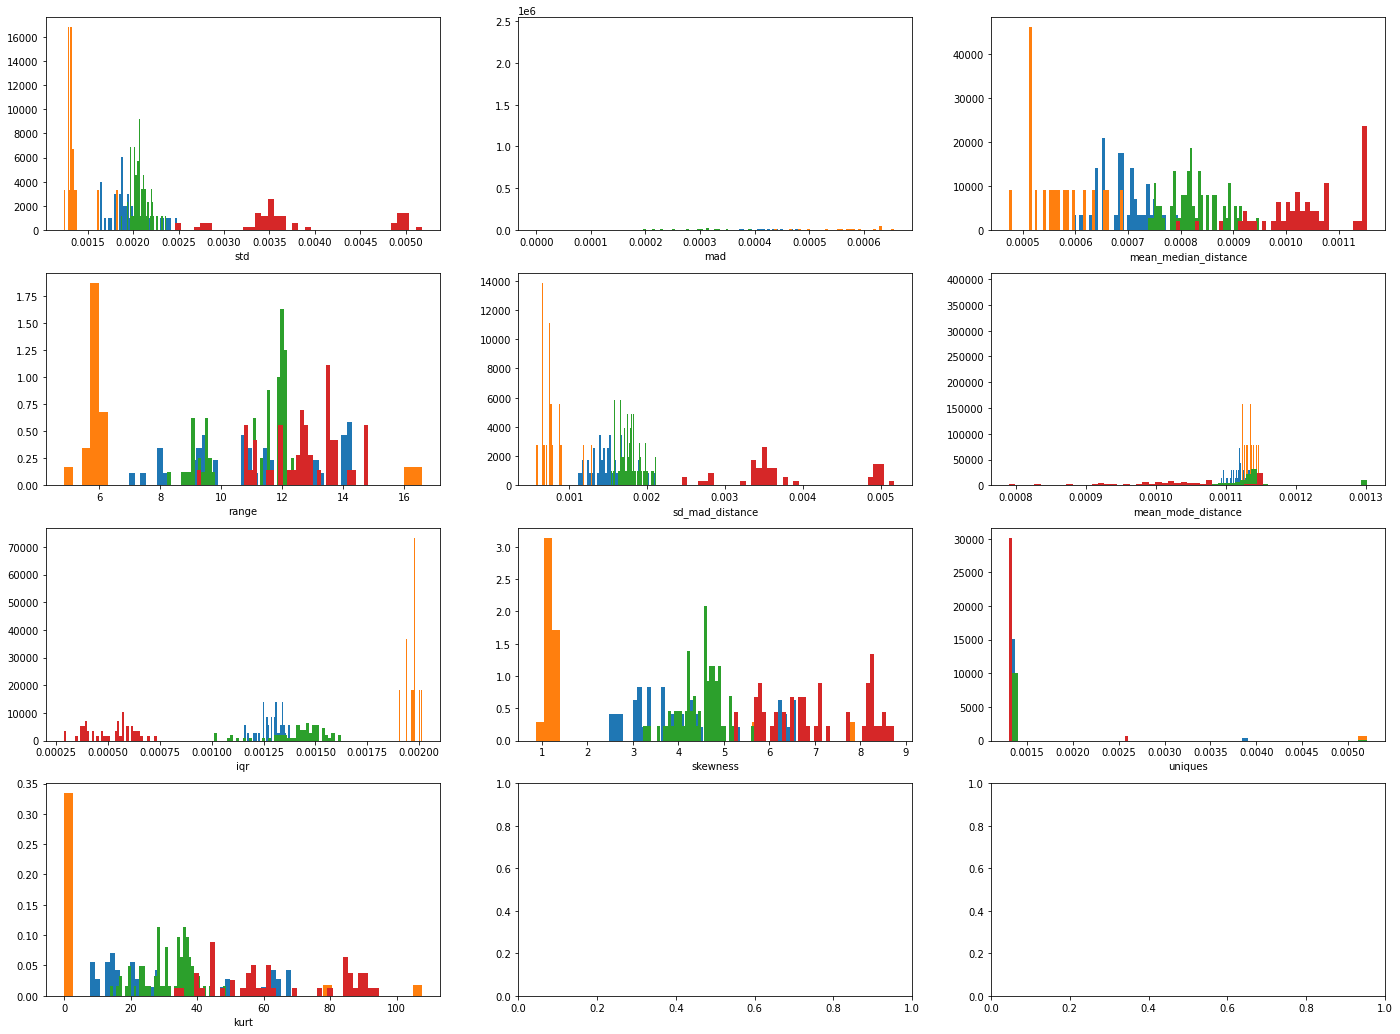

In [40]:
#plot by image id
fig, ax = plt.subplots(4, 3, figsize = (24,18))

for image_id in np.unique(image_ids)[:4]:
    fix_indexes = np.where(image_ids == image_id)[0]
    plot_statistics(posteriors[fix_indexes],ax)